First of all, we are going to import the libraries and the dataset, and we are going to have an overview of the dataset

In [40]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from src import cleaning_functions as cf
import re
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('data/attacks.csv',encoding = "ISO-8859-1")
sharks=pd.DataFrame(df)
sharks.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
23854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6587,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Thanks to a quic data review  based on our hypothesis we know that we are not going to need the following columns of the dataset:

    - Area
    - Name
    - Investigator or Source
    - pdf
    - href formula
    - href
    - Case Number.1
    - Case Number.2
    - original order
    - Unnamed: 22
    - Unnamed: 23

In [43]:
sharks.drop(['Area','Name','Investigator or Source','pdf','href formula','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23'], axis=1, inplace=True)
sharks.head()

,Case Number,Date,Year,Type,Country,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


Now that we have just the information that we need we are going to check for NaNs and remove then. First, by removing all the rows that dont have any information (all NaN) and then by working on the others NaN

In [44]:
sharks.dropna(axis='index', thresh=12,inplace=True) #We have 13 columns left, if we have 12 NaNs in a row, the other is a 0 or is not relevant
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 6265
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  2975 non-null   object 
 1   Date         2975 non-null   object 
 2   Year         2975 non-null   float64
 3   Type         2975 non-null   object 
 4   Country      2975 non-null   object 
 5   Location     2962 non-null   object 
 6   Activity     2959 non-null   object 
 7   Sex          2967 non-null   object 
 8   Age          2744 non-null   object 
 9   Injury       2975 non-null   object 
 10  Fatal (Y/N)  2891 non-null   object 
 11  Time         2522 non-null   object 
 12  Species      2244 non-null   object 
dtypes: float64(1), object(12)
memory usage: 325.4+ KB


We are going to generate a column 'Months' based on the month expressed in 'Case Number' and we want it to be a float

In [45]:

sharks['Month'] = sharks['Case Number'].str.extract(r'(\.\w+\.)')
sharks['Month'] = sharks.Month.str.extract(r'(\w+)')
sharks.Month.fillna(00,inplace=True)
monthfloat=sharks.Month.astype({'Month':int})
sharks['Month'] = monthfloat
sharks.sample(5)

,Case Number,Date,Year,Type,Country,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Month
1463,2006.07.08.b,08-Jul-2006,2006.0,Unprovoked,USA,"Debordieu Beach, Georgetown County",Body boarding,F,14,Foot bitten,N,11h00,5' to 6' spinner or bull shark,7
1836,2002.08.11,11-Aug-2002,2002.0,Unprovoked,USA,"Vero Beach, Indian River County",Surfing,M,15,Lacerations on heel & dorsum of right foot,N,15h30,"Nurse shark, 1.5 m [5']",8
1783,2003.04.21.a,21-Apr-2003,2003.0,Unprovoked,USA,"Shepard Park, Cocoa Beach, Brevard County",Surfing,M,17,Survived,N,13h30,Unidentified species,4
2711,1988.10.10,10-Oct-1988,1988.0,Unprovoked,USA,"Playalinda, Brevard County",Surfing,M,23,Hand lacerated,N,18h30,1.2 m to 1.5 m [4' to 5'] shark,10
3250,1974.09.14,14-Sep-1974,1974.0,Unprovoked,USA,"North Farallon Island, Farallon Islands",Hookah diving for abalone,M,29,Major injuries,N,13h45,"White shark, 4 m to 5 m",9


Now we are going to normalize 'Activity' and 'Type' columns for them to have less values. We are going to do so by gruping similar values.

For type, we are going to distinguish between Provoked and Unprovoked. As seen in the data, most of the boat and sea disaster are unprovoked and we are going to characterize the ones which are questionable as unprovoked, giving sharks the benefit of the doubt.

In [46]:
sharks.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Boat', 'Sea Disaster'], dtype=object)

In [47]:
sharks['Type_Norm'] = sharks.Type.apply(lambda x: 'Unprovoked' if (x == 'Boating') | (x== 'Boat') |(x == 'Unprovoked') |(x == 'Invalid') |(x == 'Questionable') |(x== 'Sea Disaster') else 'Provoked')
sharks.sample(3)


,Case Number,Date,Year,Type,Country,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Month,Type_Norm
1820,2002.10.03,03-Oct-2002,2002.0,Unprovoked,USA,"New Smyrna Beach, Volusia County",Surfing,M,18,Left hand lacerated and abraded,N,14h35,3.5' to 4' shark,10,Unprovoked
1570,2005.07.15,15-Jul-2005,2005.0,Unprovoked,USA,"Holden Beach, Brunswick County",Swimming,M,22,Lacerations of left forearm,N,16h40,[4.5' to 5'] shark,7,Unprovoked
1643,2004.08.21,21-Aug-2004,2004.0,Unprovoked,BRAZIL,"Boa Viagem Beach, Recife",Bathing,M,24,Calf bitten & both hands injured,N,13h00,"Tiger shark, 1.5 m",8,Unprovoked


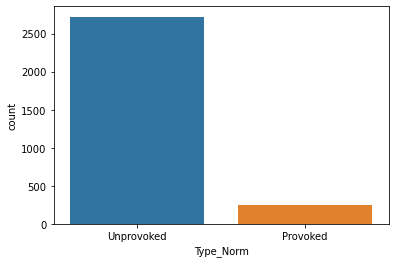

In [48]:
sns.countplot(x='Type_Norm',data=sharks);

Next, we are going to normalize the column 'Activity'. This is an open text value, so it has a wide range of values. We are going to use regex, calling some functions store in this repo.

In [49]:
#We are going to unify all the surf relataed activities into one 'Surf'
sharks.Activity=sharks.Activity.map(cf.surf,na_action='ignore')

#We are going to unify all the dive relataed activities into one 'Diving'
sharks.Activity=sharks.Activity.map(cf.dive,na_action='ignore')
#We are going to unify all the swim relataed activities into one 'Swimming'
sharks.Activity=sharks.Activity.map(cf.swim,na_action='ignore')
#We are going to unify all the fishing relataed activities into one 'Fishing'
sharks.Activity=sharks.Activity.map(cf.fish,na_action='ignore')

#We are going to unify all the boat relataed activities into one 'Boat'
sharks.Activity=sharks.Activity.map(cf.boat,na_action='ignore')

#We are going to unify the rest in a category called 'Other'
sharks.Activity=sharks.Activity.map(cf.other,na_action='ignore')


#Now that only a few values are left, we are going to introduce them into the 'Other' category by using replace
sharks.Activity.replace(['Standing','Swimminging','SDivingeling','Fishinging','SUP','Rowing','Filming', 'Swimminge Fishing', 'Swimminging?', 'Jumping',
       'Fishinging net', 'Unknown', 'RidingSwimming', '   ',
       'Fishinging ', 'Sitting', 'Fishinging using Diving', 'Splashing',
       'Fishing ', 'Fishinging on Diving', 'Washing', 'Splashing '],'Other',inplace=True)
sharks.Activity.fillna('Other',inplace=True)

sharks.Activity.unique()

array(['Surfing', 'Other', 'Swimming', 'Fishing', 'Diving', 'Boat',
       'Riding Swimming'], dtype=object)

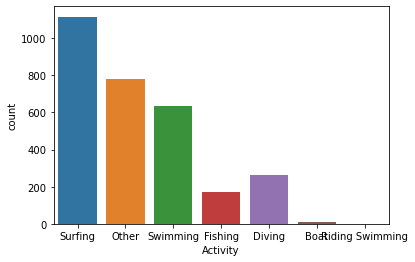

In [50]:
sns.countplot(x='Activity',data=sharks);

Now we are going to fix the 'Species' column, by removing the space in its column name and using regex as previously

In [51]:

sharks.rename(columns={'Species ':'Species'},inplace=True)

In [52]:
sharks.Species=sharks.Species.map(cf.white,na_action='ignore')
sharks.Species=sharks.Species.map(cf.tiger,na_action='ignore')
sharks.Species=sharks.Species.map(cf.lemon,na_action='ignore')
sharks.Species=sharks.Species.map(cf.bull,na_action='ignore')
sharks.Species=sharks.Species.map(cf.mako,na_action='ignore')
sharks.Species=sharks.Species.map(cf.blue,na_action='ignore')
sharks.Species=sharks.Species.map(cf.blacktip,na_action='ignore')
sharks.Species=sharks.Species.map(cf.hammerhead,na_action='ignore')
sharks.Species=sharks.Species.map(cf.nurse,na_action='ignore')
sharks.Species=sharks.Species.map(cf.whaler,na_action='ignore')
sharks.Species=sharks.Species.map(cf.caribbean,na_action='ignore')
sharks.Species=sharks.Species.map(cf.raggedtooth,na_action='ignore')
sharks.Species=sharks.Species.map(cf.spinner,na_action='ignore')

sharknames = ['White Shark','Tiger Shark','Nurse Shark','Bull Shark', 'Mako Shark','Blue Shark','Blacktip reef Shark','Hammerhead Shark','Nurse Shark','Bronze Whaler Shark', 'Caribbean Reef Shark', 'Raggedtooth Shark','Spinner Shark']
for i in range(0,len(sharks.Species)):
    if sharks['Species'].values[i] not in sharknames:
        sharks['Species'].values[i]='Unidentified'

In this moment, we are going to work with the fatality column, changing its name to a simpler one, and changing its values to 0 (survived) and 1 (fatal). This way we are going to be able to study the fatality further in the project.

In [53]:
for i in range(0,len(sharks['Fatal (Y/N)'])):
    if sharks['Fatal (Y/N)'].values[i] == 'M':
        sharks['Fatal (Y/N)'].values[i] = 0
    elif sharks['Fatal (Y/N)'].values[i] == '2017':
        sharks['Fatal (Y/N)'].values[i] = 0
    elif sharks['Fatal (Y/N)'].values[i] == ' N':
        sharks['Fatal (Y/N)'].values[i] = 0
    elif sharks['Fatal (Y/N)'].values[i] == 'UNKNOWN':
        sharks['Fatal (Y/N)'].values[i] = 0
    elif sharks['Fatal (Y/N)'].values[i] == 'N':
        sharks['Fatal (Y/N)'].values[i] = 0
    else:
        sharks['Fatal (Y/N)'].values[i] = 1
sharks['Fatal (Y/N)'].fillna('UNKNOWN',inplace=True)

In [54]:
sharks['Fatal (Y/N)'].unique()

array([0, 1])

In [55]:
sharks.rename(columns = {'Fatal (Y/N)':'Fatal'},inplace=True)

We are going to do the same with the sex column.

In [56]:
sharks.rename(columns={'Sex ':'Sex'},inplace=True)


In [57]:
sharks.Sex.replace(to_replace = 'M ', value='M',inplace=True)
sharks.Sex.replace(to_replace = 'lli', value='unknown',inplace=True)
sharks.Sex.fillna('unknown',inplace=True)


In [58]:
sharks.Sex.unique()

array(['F', 'M', 'unknown'], dtype=object)

With the Country column, as there are too many countries with just few register, we are going to center our attention in the ones that appear the most. For this we are goint to reset the index to be able to go through all the dataset and change the countries with few appearences to 'Other'

In [59]:

sharks.reset_index(inplace=True)
sharks.head()

,index,Case Number,Date,Year,Type,Country,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Month,Type_Norm
0,0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,"Oceanside, San Diego County",Surfing,F,57,"No injury to occupant, outrigger canoe and pad...",0,18h00,White Shark,6,Unprovoked
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,"St. Simon Island, Glynn County",Other,F,11,Minor injury to left thigh,0,14h00 -15h00,Unidentified,6,Unprovoked
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,0,07h45,Unidentified,6,Unprovoked
3,6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,"Piedade Beach, Recife",Swimming,M,18,FATAL,1,Late afternoon,Tiger Shark,6,Unprovoked
4,7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,Minor injury to foot. PROVOKED INCIDENT,0,NaN,Nurse Shark,5,Unprovoked


In [60]:
for i in range(0,len(sharks.Country)):
    country=[sharks.Country[i]]
    
    cuenta=sharks.Country.value_counts()[country[0]]
    
    if  cuenta<= 20:
        sharks.Country[i] = 'OTHER'

In [61]:
countries= sharks.Country.unique()
sharks.Country.replace(to_replace='ENGLAND',value='UNITED KINGDOM',inplace=True)
sharks.Country.replace(to_replace='SCOTLAND',value='UNITED KINGDOM',inplace=True)
sharks.Country.replace(to_replace='NEW BRITAIN',value='USA',inplace=True)
sharks.Country.replace(to_replace='PACIFIC OCEAN',value='OTHER',inplace=True)



After all this analysis, we realize that we are not longer going to need the following columns: 'index', 'Case Number', 'Type', 'Location', 'Time'. We are going to order the columns in a more rational order.

We are also going to create a new column that indicates the hemisphere in which the country is located.

In [62]:
sharks.drop(['index', 'Case Number', 'Type', 'Location', 'Time'],axis=1,inplace=True)

In [63]:
northhem = ['USA','ENGLAND', 'COSTA RICA', 'OTHER', 'BAHAMAS', 'ECUADOR','CUBA', 'SPAIN', 'MEXICO', 'UNITED KINGDOM'
        , 'PHILIPPINES', 'JAPAN', 'COLUMBIA',
       'EGYPT', 'JAMAICA', 'SCOTLAND', 'ITALY', 'TAIWAN', 
       'TURKS & CAICOS', 'VIETNAM', 'GUAM',
       'PANAMA', 'CROATIA', 'VENEZUELA',
       'INDIA', 'OKINAWA', 'MARSHALL ISLANDS', 'SENEGAL',
       'HONG KONG', 'PALAU', 'GRENADA', 'IRAQ',
       'BERMUDA', 'NEW BRITAIN', 'GREECE', 'PACIFIC OCEAN']
sourthhem = []
for i in range(0,len(sharks.Country)):
    country=sharks.Country[i]
    if sharks.Country[i] not in northhem:
        if sharks.Country[i] not in sourthhem:
            sourthhem.append(country)
sourthhem

['BRAZIL',
 'AUSTRALIA',
 'SOUTH AFRICA',
 'NEW ZEALAND',
 'REUNION',
 'MOZAMBIQUE',
 'PAPUA NEW GUINEA']

In [64]:
hemisphere = []
for i in range(0,len(sharks.Country)):
    country=sharks.Country[i]
    if sharks.Country[i] not in northhem:
        hemisphere.append('Southern')
    else:
        hemisphere.append('Northern')
sharks['Hemisphere']=hemisphere
sharks.sample(10)

,Date,Year,Country,Activity,Sex,Age,Injury,Fatal,Species,Month,Type_Norm,Hemisphere
439,08-Oct-2013,2013.0,AUSTRALIA,Diving,M,55,"Injuries to torso, head and face",0,White Shark,10,Unprovoked,Southern
2679,Jul-1950,1950.0,USA,Diving,M,21,Shallow lacerations on back of right thigh,0,Unidentified,7,Unprovoked,Northern
1705,12-Aug-1993,1993.0,USA,Diving,M,39,Severe bites to head & shoulder,0,White Shark,8,Unprovoked,Northern
2726,16-Feb-1946,1946.0,SOUTH AFRICA,Other,M,21,Right arm severely lacerated,0,Unidentified,2,Unprovoked,Southern
1030,15-Jun-2006,2006.0,USA,Surfing,M,24,Four 1-inch puncture wounds on left foot,0,Unidentified,6,Unprovoked,Northern
2002,29-Jun-1982,1982.0,SOUTH AFRICA,Surfing,M,27,FATAL,1,White Shark,6,Unprovoked,Southern
1672,21-Sep-1994,1994.0,USA,Surfing,M,43,"No injury, surfboard bitten",0,White Shark,9,Unprovoked,Northern
1093,24-Aug-2005,2005.0,AUSTRALIA,Diving,M,23,FATAL,1,White Shark,8,Unprovoked,Southern
2828,21-Sep-1931,1931.0,USA,Swimming,F,20,Right thigh & calf lacerated,0,Hammerhead Shark,9,Unprovoked,Northern
2875,17-Jun-1922,1922.0,USA,Swimming,F,18,"FATAL, thigh bitten",1,Unidentified,6,Unprovoked,Northern


In [65]:
sharks=sharks[['Date','Year','Month','Country','Activity','Type_Norm','Sex','Age','Species','Fatal','Hemisphere']]
sharks.sample(5)

,Date,Year,Month,Country,Activity,Type_Norm,Sex,Age,Species,Fatal,Hemisphere
2449,13-Dec-1961,1961.0,12,AUSTRALIA,Swimming,Unprovoked,M,17,Unidentified,0,Southern
2589,23-Apr-1957,1957.0,4,AUSTRALIA,Surfing,Unprovoked,M,15,Unidentified,0,Southern
2774,16-Jul-1939,1939.0,7,BAHAMAS,Diving,Provoked,M,38,Nurse Shark,0,Northern
1204,30-Nov-2003,2003.0,11,AUSTRALIA,Swimming,Unprovoked,M,NaN,Unidentified,0,Southern
1830,14-Jul-1989,1989.0,7,USA,Surfing,Unprovoked,M,16,Unidentified,0,Northern


Following we are going to fix the Age column to eliminate special characters and letters. We are also goin to change 'Year' and 'Age' data type to an integer.

In [68]:
sharks.Age=sharks.Age.map(cf.age,na_action='ignore')
sharks.Age.unique()
sharks.Age.replace(to_replace='6½',value='0',inplace=True)
sharks.Age.unique()
sharks.Age.fillna('0',inplace=True)
sharks.Age.unique()
sharks.Age.replace(to_replace='nan',value='0',inplace=True)

sharks.Age.astype(int);

In [69]:
yearint=sharks.Year.astype({'Year':int})
sharks['Year'] = yearint

Finally wea re going to create one more column indicating the decade of the attack. This way we will be able to study the events group by a number of year in case there are some years without cases.

In [70]:
sharks['YearRange']=sharks.Year
for i in range(0,len(sharks.Year)):
    if sharks.Year[i] < 1860:
        sharks.YearRange[i]=1850
    elif sharks.Year[i] < 1870:
        sharks.YearRange[i]=1860
    elif sharks.Year[i] < 180:
        sharks.YearRange[i]=1870
    elif sharks.Year[i] < 1880:
        sharks.YearRange[i]=1870
    elif sharks.Year[i] < 1890:
        sharks.YearRange[i]=1880
    elif sharks.Year[i] < 1900:
        sharks.YearRange[i]=1890
    elif sharks.Year[i] < 1910:
        sharks.YearRange[i]=1900
    elif sharks.Year[i] < 1920:
        sharks.YearRange[i]=1910
    elif sharks.Year[i] < 1930:
        sharks.YearRange[i]=1920
    elif sharks.Year[i] < 1940:
        sharks.YearRange[i]=1930
    elif sharks.Year[i] < 1950:
        sharks.YearRange[i]=1940
    elif sharks.Year[i] < 1960:
        sharks.YearRange[i]=1950
    elif sharks.Year[i] < 1970:
        sharks.YearRange[i]=1960
    elif sharks.Year[i] < 1980:
        sharks.YearRange[i]=1970
    elif sharks.Year[i] < 1990:
        sharks.YearRange[i]=1980
    elif sharks.Year[i] < 2000:
        sharks.YearRange[i]=1990
    elif sharks.Year[i] < 2010:
        sharks.YearRange[i]=2000
    elif sharks.Year[i] < 2020:
        sharks.YearRange[i]=2010
    elif sharks.Year[i] < 2030:
        sharks.YearRange[i]=2020


In [72]:
sharks.head()

,Year,Month,Country,Hemisphere,Activity,Type_Norm,Sex,Age,Species,Fatal,YearRange
0,2018,6,USA,Northern,Surfing,Unprovoked,F,57,White Shark,0,2010
1,2018,6,USA,Northern,Other,Unprovoked,F,11,Unidentified,0,2010
2,2018,6,USA,Northern,Surfing,Unprovoked,M,48,Unidentified,0,2010
3,2018,6,BRAZIL,Southern,Swimming,Unprovoked,M,18,Tiger Shark,1,2010
4,2018,5,USA,Northern,Fishing,Unprovoked,M,52,Nurse Shark,0,2010


In [71]:
sharks=sharks[['Year','Month','Country','Hemisphere','Activity','Type_Norm','Sex','Age','Species','Fatal','YearRange']]
sharks.to_csv('data/sharks_clean.csv')